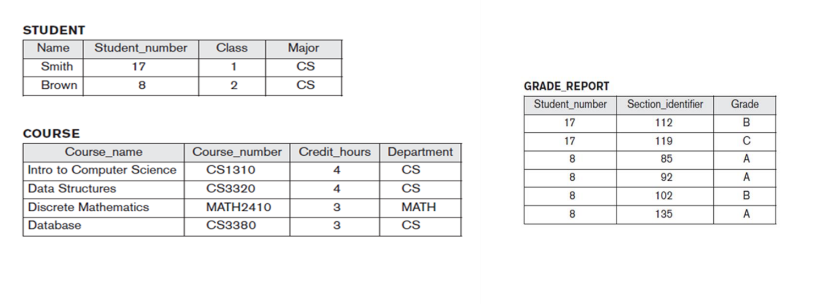

# Create and Fill the tables

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('debi.db')

# Create a cursor object
cursor = conn.cursor()

# Drop existing tables if they exist
cursor.execute('DROP TABLE IF EXISTS Student')
cursor.execute('DROP TABLE IF EXISTS Course')
cursor.execute('DROP TABLE IF EXISTS Grade_Report')

# Create Student table
cursor.execute('''
CREATE TABLE Student (
    Student_Name TEXT NOT NULL,
    Student_Number INTEGER NOT NULL,
    Class INTEGER NOT NULL,
    Major TEXT NOT NULL
)
''')

# Insert data into Student table
cursor.execute("INSERT INTO Student (Student_Name, Student_Number, Class, Major) VALUES ('Smith', 17, 1, 'CS')")
cursor.execute("INSERT INTO Student (Student_Name, Student_Number, Class, Major) VALUES ('Brown', 8, 2, 'CS')")

# Create Course table
cursor.execute('''
CREATE TABLE Course (
    Course_Name TEXT NOT NULL,
    Course_Number TEXT NOT NULL,
    Credit_Hours INTEGER NOT NULL,
    Department TEXT NOT NULL
)
''')

# Insert data into Course table
cursor.executemany("INSERT INTO Course (Course_Name, Course_Number, Credit_Hours, Department) VALUES (?, ?, ?, ?)", [
    ('Intro to Computer Science', 'Cs1310', 4, 'CS'),
    ('Data Structure', 'CS3320', 4, 'CS'),
    ('Discrete Mathematics', 'MATH2410', 3, 'MATH'),
    ('Database', 'CS3380', 3, 'CS')
])

# Create Grade_Report table
cursor.execute('''
CREATE TABLE Grade_Report (
    Student_Number INTEGER NOT NULL,
    Section_Identifier INTEGER NOT NULL,
    Grade TEXT NOT NULL
)
''')

# Insert data into Grade_Report table
cursor.executemany("INSERT INTO Grade_Report VALUES (?, ?, ?)", [
    (17, 112, 'B'),
    (17, 119, 'C'),
    (8, 85, 'A'),
    (8, 91, 'A'),
    (8, 102, 'B'),
    (8, 135, 'A')
])

# Commit the changes
conn.commit()

# Close the cursor and connection
cursor.close()
conn.close()

# Qestion 1: Print and verify all the tables

In [5]:
# Hint: Write a function that takes in a table name and prints it
def get_data(table):
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    cursor.execute(f'''
     SELECT * FROM {table}
      ''')
    data = cursor.fetchall()
    conn.close
    return data
get_data('Student')

[('Smith', 17, 1, 'CS'), ('Brown', 8, 2, 'CS')]

# Question 3: List Courses with More Than 3 Credit Hours


In [10]:
def x():
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    
    cursor.execute('''
         SELECT Course_Name FROM Course
         WHERE Credit_Hours > 3
          ''')

x()

In [11]:
def cc():
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    cursor.execute(f'''
     SELECT Course_Name FROM Course
         WHERE Credit_Hours > 3
      ''')
    data = cursor.fetchall()
    conn.close
    return data
cc()

[('Intro to Computer Science',), ('Data Structure',)]

# Question 4: List Students in a Specific Grade

In [23]:
def xx():
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    cursor.execute(f'''
     SELECT Student_Number FROM Grade_Report
    
         GROUP BY  Grade 
      ''')
    data = cursor.fetchall()
    conn.close
    return data
xx()

[(8,), (17,), (17,)]

# Question 5: List Courses Sorted by Credit Hours

In [16]:
def ZZ():
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    cursor.execute(f'''
     SELECT Course_Name FROM Course
         ORDER BY Credit_Hours 
      ''')
    data = cursor.fetchall()
    conn.close
    return data
ZZ()

[('Discrete Mathematics',),
 ('Database',),
 ('Intro to Computer Science',),
 ('Data Structure',)]

# Question 7: Courses with the Lowest Credit Hours


In [22]:
def DD():
    conn = sqlite3.connect('debi.db')
    cursor = conn.cursor()
    cursor.execute(f'''
     SELECT Course_Name FROM Course
     WHERE Credit_Hours = (SELECT  min(Credit_Hours)  from Course )
         
      ''')
    data = cursor.fetchall()
    conn.close
    return data
DD()

[('Discrete Mathematics',), ('Database',)]